# Selenium 및 BeautifulSoup을 이용한 동적 및 정적 크롤링

In [3]:
import os
os.getcwd()

'c:\\Users\\Administrator\\Documents\\카카오톡 받은 파일'

In [4]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

## 1. 남성 옷

______________________________

In [5]:
# 패션 스타일 카테고리별 데이터프레임 생성
american_casual_m = pd.DataFrame(columns=['title','img', 'link'])
casual_m = pd.DataFrame(columns=['title','img', 'link'])
dandy_m = pd.DataFrame(columns=['title','img', 'link'])
formal_m = pd.DataFrame(columns=['title','img', 'link'])
sports_m = pd.DataFrame(columns=['title','img', 'link'])
street_m = pd.DataFrame(columns=['title','img', 'link'])

### 1-1. 크롤링 함수 정의

In [6]:
#상세품목 크롤링 함수
def crawling_detailproducts(product_links):
    #prouct_links: 상세품목 링크 리스트
    details = []
    for i in product_links:
        res = requests.get(i,  headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(res.content, 'html.parser')

        #해시태그
        hashtag = soup.find_all('a', 'listItem')
        tag = str(hashtag).split('"')
        hash =[]
        j=4
        while j < len(tag):
            t = tag[j].split('#')[1].split('<')[0]
            hash.append(t)
            j += 4

        #합치기
        detail = [hash]
        details.append(detail)
       
    return details
        

남성 탭을 클릭해야 남성 페이지가 도출되므로 동적크롤링 실시

In [13]:
# 남성 코디 크롤링
# selenium을 이용한 동적 크롤링 & Beautifulsoup을 이용한 정적 크롤링

# 크롤링 함수 생성
def crawling_musinsa(pagelink, style_name, df):
    driver = webdriver.Chrome('c:/Users/Administrator/Documents/카카오톡 받은 파일/chromedriver.exe')
    driver.get(pagelink)
    time.sleep(1)

    #남성 탭 클릭
    x_path = '/html/body/div[3]/div[3]/div[1]/button[2]'
    codiforman = driver.find_element(By.XPATH, x_path)
    codiforman.click()
    html = driver.page_source

    soup = BeautifulSoup(html, 'html.parser')
    content = soup.find_all('a', 'style-list-item__link')

    #코디 제목, 링크 
    title = []
    link = []
    for i in content:
        con = str(i).split('"')
        title.append(con[7])
        li = 'https://www.musinsa.com/app/styles/views/' + con[5].split("'")[1] + '?use_yn_360=&style_type=' + style_name + '&brand=&model=&tag_no=&max_rt=&min_rt=&display_cnt=60&list_kind=big&sort=view_cnt&page=1'
        link.append(li)

    df['title'] = title
    df['link'] = link


    #코디 상세페이지
    img = []
    txt_total = []
    hashtag_total = []
    product_link_total = []
    product_detail_total = []

    for i in df['link']:
        res = requests.get(i,  headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(res.content, 'html.parser')
        #해시태그
        hashtag = soup.find_all('div', 'ui-tag-list')
        tag = str(hashtag).split('"')
        hash =[]
        j=7
        while j < len(tag):
            hash.append(tag[j])
            j += 8

        #저장
        hashtag_total.append(hash)
        
        

    
    df['hashtag'] = hashtag_total

    driver.close()


### 1-2. 각 카테고리 별 크롤링

In [11]:
#american_casual_m에 대해 크롤링
pagelink = 'https://www.musinsa.com/app/styles/lists?use_yn_360=&style_type=americancasual&brand=&model=&tag_no=&max_rt=&min_rt=&display_cnt=60&list_kind=big&sort=view_cnt&page=2'
crawling_musinsa(pagelink, 'americancasual', american_casual_m)
american_casual_m.head()

<ipython-input-10-34a7cb16728f>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/Administrator/Documents/카카오톡 받은 파일/chromedriver.exe')


,title,img,link,hashtag,product_links,products_info
0,과감한 벌룬 핏,NaN,https://www.musinsa.com/app/styles/views/29936...,"[겨울, 아메리칸 캐주얼, 미즈노, 배드블러드, 세컨모놀로그, 앵글런, 우알롱, 카...","[https://www.musinsa.com/app/goods/2745807/0, ...","[[[퀼팅자켓, 퀼팅패딩, 재킷, 숏자켓, 퀼팅점퍼, 깔깔이, 패딩점퍼]], [[카..."
1,강추위 대비,NaN,https://www.musinsa.com/app/styles/views/29889...,"[겨울, 아메리칸 캐주얼, 곤니치와봉쥬르, 널디, 무신사 스탠다드, 블런드스톤, 어...","[https://www.musinsa.com/app/goods/2789777/0, ...","[[[플리스]], [[]], [[기본티, 무지티, 여름티셔츠, 하프슬리브, MU-T..."
2,산뜻한 조합,NaN,https://www.musinsa.com/app/styles/views/24452...,"[레이어드룩, 페이즐리, 와이드핏, 코듀로이, 아메카지, 핀턱, 겨울, 아메리칸 캐...","[https://www.musinsa.com/app/goods/2234044/0, ...","[[[코닥어패럴, 패딩코트, 롱다운, 패딩, 다운자켓, 겨울아우터, 점퍼]], [[..."
3,시티보이 무드,NaN,https://www.musinsa.com/app/styles/views/25690...,"[시티보이룩, 아메카지, 레터링, 벌룬핏, 체크, 뉴트럴톤, 레이어드룩, 봄, 아메...","[https://www.musinsa.com/app/goods/2130645/0, ...","[[[스웨트셔츠, 크루넥, 긴팔티, 맨투맨티셔츠, 커플맨투맨, 로고맨투맨, 스웻셔츠..."
4,톤온톤 코디,NaN,https://www.musinsa.com/app/styles/views/29808...,"[뉴트럴톤, 톤온톤, 아가일, 코듀로이, 스티치, 레이어드룩, 가을, 아메리칸 캐주...","[https://www.musinsa.com/app/goods/2780227/0, ...","[[[코트컬렉션]], [[데일리가디건, 간절기아우터, 오버핏가디건, 가디건, 니트가..."


In [14]:
american_casual_m.to_csv('c:\\Users\\Administrator\\Documents\\카카오톡 받은 파일/american_casual_man2.csv')

In [15]:
pagelink = 'https://www.musinsa.com/app/styles/lists?use_yn_360=&style_type=casual&brand=&model=&tag_no=&max_rt=&min_rt=&display_cnt=60&list_kind=big&sort=view_cnt&page=2'
crawling_musinsa(pagelink, 'casual', casual_m)
casual_m.head()

<ipython-input-13-fc74b320687d>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/Administrator/Documents/카카오톡 받은 파일/chromedriver.exe')


,title,img,link,hashtag
0,무심한듯 멋있게,NaN,https://www.musinsa.com/app/styles/views/8083?...,"[봄, 캐주얼, 라모랭, 에드, 유니폼브릿지, 에프터글로우, 반스, 비니, 기타 시..."
1,2090,NaN,https://www.musinsa.com/app/styles/views/1035?...,"[캠퍼스, 레이어드룩, 겨울, 캐주얼, 와이엠씨엘케이와이, 커버낫, 에이치 블레이드..."
2,시티보이,NaN,https://www.musinsa.com/app/styles/views/21434...,"[꾸안꾸, 시티보이룩, 레이어드룩, 그래픽, 오버핏, 와이드핏, 여름, 캐주얼, 그..."
3,1080,NaN,https://www.musinsa.com/app/styles/views/816?u...,"[레터링, 봄, 캐주얼, 에스피오나지, 아디다스, 숄더백, 비니, 안경 소품, 액자..."
4,귀찮은 날엔,NaN,https://www.musinsa.com/app/styles/views/7595?...,"[겨울, 캐주얼, 챔피온, 낫포너드, 매스노운, 아디다스, 반소매 티셔츠, 안경 소..."


In [16]:
casual_m.to_csv('c:\\Users\\Administrator\\Documents\\카카오톡 받은 파일/casual_man2.csv')

In [17]:
pagelink = 'https://www.musinsa.com/app/styles/lists?use_yn_360=&style_type=dandy&brand=&model=&tag_no=&max_rt=&min_rt=&display_cnt=60&list_kind=big&sort=view_cnt&page=2'
crawling_musinsa(pagelink, 'dandy', dandy_m)

<ipython-input-13-fc74b320687d>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/Administrator/Documents/카카오톡 받은 파일/chromedriver.exe')


In [18]:
dandy_m.to_csv('c:\\Users\\Administrator\\Documents\\카카오톡 받은 파일/dandy_man2.csv')

In [20]:
pagelink = 'https://www.musinsa.com/app/styles/lists?use_yn_360=&style_type=formal&brand=&model=&tag_no=&max_rt=&min_rt=&display_cnt=60&list_kind=big&sort=view_cnt&page=2'
crawling_musinsa(pagelink, 'formal', formal_m)

<ipython-input-13-fc74b320687d>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/Administrator/Documents/카카오톡 받은 파일/chromedriver.exe')


In [21]:
formal_m.to_csv('c:\\Users\\Administrator\\Documents\\카카오톡 받은 파일/formal_man2.csv')

In [22]:
pagelink = 'https://www.musinsa.com/app/styles/lists?use_yn_360=&style_type=sports&brand=&model=&tag_no=&max_rt=&min_rt=&display_cnt=60&list_kind=big&sort=view_cnt&page=2'
crawling_musinsa(pagelink, 'sports', sports_m)

<ipython-input-13-fc74b320687d>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/Administrator/Documents/카카오톡 받은 파일/chromedriver.exe')


In [23]:
sports_m.to_csv('c:\\Users\\Administrator\\Documents\\카카오톡 받은 파일/sports_man2.csv')

In [24]:
pagelink = 'https://www.musinsa.com/app/styles/lists?use_yn_360=&style_type=street&brand=&model=&tag_no=&max_rt=&min_rt=&display_cnt=60&list_kind=big&sort=view_cnt&page=2'
crawling_musinsa(pagelink, 'street', street_m)

<ipython-input-13-fc74b320687d>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/Administrator/Documents/카카오톡 받은 파일/chromedriver.exe')


In [26]:
street_m.to_csv('c:\\Users\\Administrator\\Documents\\카카오톡 받은 파일/street_man2.csv')

### 무신사 워드클라우드

In [4]:
import pandas as pd
american_casual_m = pd.read_csv('C:/Users/Administrator/Documents/카카오톡 받은 파일/musinsa/american_casual_man.csv')
casual_m = pd.read_csv('C:/Users/Administrator/Documents/카카오톡 받은 파일/musinsa/casual_man.csv')
dandy_m = pd.read_csv('C:/Users/Administrator/Documents/카카오톡 받은 파일/musinsa/dandy_man.csv')
formal_m = pd.read_csv('C:/Users/Administrator/Documents/카카오톡 받은 파일/musinsa/formal_man.csv')
sports_m = pd.read_csv('C:/Users/Administrator/Documents/카카오톡 받은 파일/musinsa/sports_man.csv')
street_m = pd.read_csv('C:/Users/Administrator/Documents/카카오톡 받은 파일/musinsa/street_man.csv')
american_casual_m2 = pd.read_csv('C:/Users/Administrator/Documents/카카오톡 받은 파일/musinsa/american_casual_man2.csv')
casual_m2 = pd.read_csv('C:/Users/Administrator/Documents/카카오톡 받은 파일/musinsa/casual_man2.csv')
dandy_m2 = pd.read_csv('C:/Users/Administrator/Documents/카카오톡 받은 파일/musinsa/dandy_man2.csv')
formal_m2 = pd.read_csv('C:/Users/Administrator/Documents/카카오톡 받은 파일/musinsa/formal_man2.csv')
sports_m2 = pd.read_csv('C:/Users/Administrator/Documents/카카오톡 받은 파일/musinsa/sports_man2.csv')
street_m2 = pd.read_csv('C:/Users/Administrator/Documents/카카오톡 받은 파일/musinsa/street_man2.csv')

In [6]:
american_casual_man = american_casual_m.loc[:,['title','hashtag']]
american_casual_man['category'] = '아메리칸캐주얼'
casual_man = casual_m.loc[:,['title','hashtag']]
casual_man['category'] = '캐주얼'
dandy_man = dandy_m.loc[:,['title','hashtag']]
dandy_man['category'] = '댄디'
formal_man = formal_m.loc[:,['title','hashtag']]
formal_man['category'] = '포멀'
sports_man = sports_m.loc[:,['title','hashtag']]
sports_man['category'] = '스포츠'
street_man = street_m.loc[:,['title','hashtag']]
street_man['category'] = '스트릿'

american_casual_man2 = american_casual_m2.loc[:,['title','hashtag']]
american_casual_man2['category'] = '아메리칸캐주얼'
casual_man2 = casual_m2.loc[:,['title','hashtag']]
casual_man2['category'] = '캐주얼'
dandy_man2 = dandy_m2.loc[:,['title','hashtag']]
dandy_man2['category'] = '댄디'
formal_man2 = formal_m2.loc[:,['title','hashtag']]
formal_man2['category'] = '포멀'
sports_man2 = sports_m2.loc[:,['title','hashtag']]
sports_man2['category'] = '스포츠'
street_man2 = street_m2.loc[:,['title','hashtag']]
street_man2['category'] = '스트릿'

In [7]:
hashtag_list = [american_casual_man, casual_man, dandy_man, formal_man, sports_man, street_man, american_casual_man2, casual_man2, dandy_man2, formal_man2, sports_man2, street_man2]

In [8]:
##해시태그 각각을 리스트로 저장
import ast
for j in hashtag_list:
  for i in range (len(j)):
    j.at[i,"hashtag"] = ast.literal_eval(j.at[i, "hashtag"])

In [11]:
musinsa = pd.concat([american_casual_man, casual_man, dandy_man, formal_man, sports_man, street_man, american_casual_man2, casual_man2, dandy_man2, formal_man2, sports_man2, street_man2],ignore_index=True)

In [10]:
import collections

In [12]:
##스타일 별 사용된 해시태그를 딕셔너리 형태로 저장

##아메리칸캐주얼
col = musinsa.loc[musinsa['category']=='아메리칸캐주얼']
american_casual_man_hashlist = []
for i in col['hashtag']:
  for j in i:
    american_casual_man_hashlist.append(j)
american_casual_man_cnt = collections.Counter(american_casual_man_hashlist)

##캐주얼
col = musinsa.loc[musinsa['category']=='캐주얼']
casual_man_hashlist = []
for i in col['hashtag']:
  for j in i:
    casual_man_hashlist.append(j)
casual_man_cnt = collections.Counter(casual_man_hashlist)

##댄디
col = musinsa.loc[musinsa['category']=='댄디']
dandy_man_hashlist = []
for i in col['hashtag']:
  for j in i:
    dandy_man_hashlist.append(j)
dandy_man_cnt = collections.Counter(dandy_man_hashlist)

##포멀
col = musinsa.loc[musinsa['category']=='포멀']
formal_man_hashlist = []
for i in col['hashtag']:
  for j in i:
    formal_man_hashlist.append(j)
formal_man_cnt = collections.Counter(formal_man_hashlist)

##스포츠
col = musinsa.loc[musinsa['category']=='스포츠']
sports_man_hashlist = []
for i in col['hashtag']:
  for j in i:
    sports_man_hashlist.append(j)
sports_man_cnt = collections.Counter(sports_man_hashlist)

##스트릿
col = musinsa.loc[musinsa['category']=='스트릿']
street_man_hashlist = []
for i in col['hashtag']:
  for j in i:
    street_man_hashlist.append(j)
street_man_cnt = collections.Counter(street_man_hashlist)

# 스타일 별 해시태그 키워드 기반 워드클라우드 생성

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [21]:
font_path = '/usr/share/fonts/truetype/nanumfont/NanumGothic.ttf'



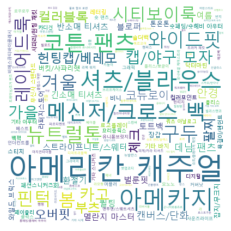

In [23]:
wordCloud = WordCloud(
font_path = r"C:/Windows/Fonts/malgun.ttf", # 폰트 지정
width = 400, # 워드 클라우드의 너비 지정
height = 400, # 워드클라우드의 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(american_casual_man_cnt) # 워드 클라우드 빈도수 지정
plt.figure()
plt.axis('off')
plt.imshow(wordCloud, interpolation='bilinear') 
plt.show()

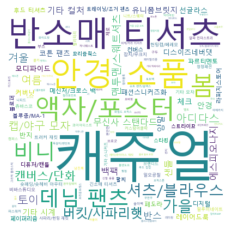

In [24]:
wordCloud = WordCloud(
font_path = r"C:/Windows/Fonts/malgun.ttf", # 폰트 지정
width = 400, # 워드 클라우드의 너비 지정
height = 400, # 워드클라우드의 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(casual_man_cnt) # 워드 클라우드 빈도수 지정
plt.figure()
plt.axis('off')
plt.imshow(wordCloud, interpolation='bilinear') 
plt.show()

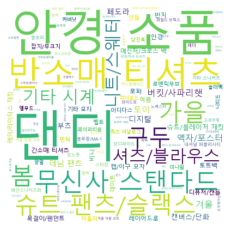

In [25]:
wordCloud = WordCloud(
font_path = r"C:/Windows/Fonts/malgun.ttf", # 폰트 지정
width = 400, # 워드 클라우드의 너비 지정
height = 400, # 워드클라우드의 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(dandy_man_cnt) # 워드 클라우드 빈도수 지정
plt.figure()
plt.axis('off')
plt.imshow(wordCloud, interpolation='bilinear') 
plt.show()

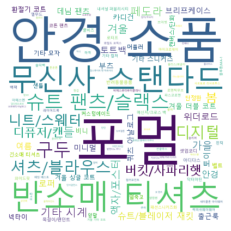

In [26]:
wordCloud = WordCloud(
font_path = r"C:/Windows/Fonts/malgun.ttf", # 폰트 지정
width = 400, # 워드 클라우드의 너비 지정
height = 400, # 워드클라우드의 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(formal_man_cnt) # 워드 클라우드 빈도수 지정
plt.figure()
plt.axis('off')
plt.imshow(wordCloud, interpolation='bilinear') 
plt.show()

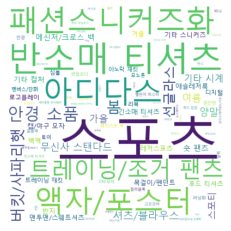

In [27]:
wordCloud = WordCloud(
font_path = r"C:/Windows/Fonts/malgun.ttf", # 폰트 지정
width = 400, # 워드 클라우드의 너비 지정
height = 400, # 워드클라우드의 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(sports_man_cnt) # 워드 클라우드 빈도수 지정
plt.figure()
plt.axis('off')
plt.imshow(wordCloud, interpolation='bilinear') 
plt.show()

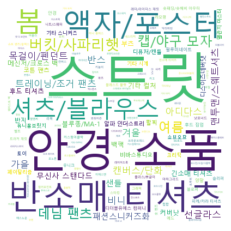

In [28]:
wordCloud = WordCloud(
font_path = r"C:/Windows/Fonts/malgun.ttf", # 폰트 지정
width = 400, # 워드 클라우드의 너비 지정
height = 400, # 워드클라우드의 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(street_man_cnt) # 워드 클라우드 빈도수 지정
plt.figure()
plt.axis('off')
plt.imshow(wordCloud, interpolation='bilinear') 
plt.show()